In [1]:
########################################
# importing packages
########################################
import pandas            as pd                          # data science essentials
import matplotlib.pyplot as plt                         # fundamental data visualization
import seaborn           as sns                         # enhanced visualizations
from sklearn.preprocessing import StandardScaler        # standard scaler
from sklearn.decomposition import PCA                   # pca
from scipy.cluster.hierarchy import dendrogram, linkage # dendrograms
from sklearn.cluster import KMeans              # k-means clustering

In [52]:
########################################
# inertia
########################################
def inertia_plot(data, max_clust = 50):
    """
PARAMETERS
----------
data      : DataFrame, data from which to build clusters. Dataset should be scaled
max_clust : int, maximum of range for how many clusters to check interia, default 50
    """

    ks = range(1, max_clust)
    inertias = []


    for k in ks:
        # INSTANTIATING a kmeans object
        model = KMeans(n_clusters = k)


        # FITTING to the data
        model.fit(data)


        # append each inertia to the list of inertias
        inertias.append(model.inertia_)



    # plotting ks vs inertias
    fig, ax = plt.subplots(figsize = (12, 8))
    plt.plot(ks, inertias, '-o')


    # labeling and displaying the plot
    plt.xlabel('number of clusters, k')
    plt.ylabel('inertia')
    plt.xticks(ks)
    plt.show()


########################################
# scree_plot
########################################
def scree_plot(pca_object, export = False):
    # building a scree plot

    # setting plot size
    fig, ax = plt.subplots(figsize=(10, 8))
    features = range(pca_object.n_components_)


    # developing a scree plot
    plt.plot(features,
             pca_object.explained_variance_ratio_,
             linewidth = 2,
             marker = 'o',
             markersize = 10,
             markeredgecolor = 'black',
             markerfacecolor = 'grey')


    # setting more plot options
    plt.title('Scree Plot')
    plt.xlabel('PCA feature')
    plt.ylabel('Explained Variance')
    plt.xticks(features)

    if export == True:
    
        # exporting the plot
        plt.savefig('top_customers_correlation_scree_plot.png')
        
    # displaying the plot
    plt.show()

In [2]:
# Load Data
filepath = "/Users/maximilianpaulus/Documents/03_HULT/MBAN_Module B/Machine Learning/Final Exam/survey_data.xlsx"
df = pd.read_excel(filepath)


In [3]:
# Splitting DataFrame into topic specifis datafranes 
bf_df = df.iloc[:,1:51]
dna_df = df.iloc[:,51:72]
dem_df = df.iloc[:,72:79]

In [9]:
# Renaming Big Five Columns into bf + col index
bf_id = []
for i in range(1, len(bf_df.columns)+1):
    bf_id.append('bf'+str(i))
bf_df.columns = bf_id

# Renaming HULT DNA Columns into dna + col index
dna_id = []
for i in range(1, len(dna_df.columns)+1):
    dna_id.append('dna'+str(i))
dna_df.columns = dna_id

# Renaming Demographic Columns into dem + col index
dem_id = []
for i in range(1, len(dem_df.columns)+1):
    dem_id.append('dem'+str(i))
dem_df.columns = dem_id

In [15]:
bf_df.head(10)

,bf1,bf2,bf3,bf4,bf5,bf6,bf7,bf8,bf9,bf10,...,bf42,bf43,bf44,bf45,bf46,bf47,bf48,bf49,bf50,bf51
0,4,3,4,3,4,2,3,2,3,2,...,3,4,2,4,3,3,4,2,3,4
1,2,4,3,4,3,3,2,3,4,2,...,3,5,4,5,4,5,5,3,4,4
2,4,4,5,1,4,3,2,2,5,1,...,3,4,4,2,3,3,3,1,4,3
3,4,5,3,3,3,3,5,3,5,4,...,5,3,5,5,3,5,3,3,5,3
4,5,4,4,4,3,3,3,3,3,3,...,4,4,3,3,3,3,4,4,3,3
5,3,2,2,5,2,2,4,2,3,2,...,4,2,4,4,4,3,3,4,3,4
6,3,4,4,5,3,4,4,3,2,1,...,4,4,4,3,5,4,3,3,3,4
7,4,3,2,2,2,3,5,5,5,4,...,2,1,1,2,3,4,3,3,2,3
8,3,5,4,2,4,1,4,1,3,1,...,4,4,1,5,3,4,4,1,3,4
9,1,3,5,4,2,3,3,1,4,3,...,4,4,2,3,4,4,4,2,3,4


In [19]:
# For Loop to reverse values of negated questions 
# Only run this script if data was reloaded, otherwise negated column values are flipped again

#for i in ("bf2","bf6","bf8","bf9","bf10","bf12","bf16","bf18","bf19","bf20","bf22"
#         ,"bf26","bf28","bf30","bf32","bf36","bf38","bf46"):
#    for index, col in bf_df.iterrows():
#        if bf_df.loc[index, i] == 1:
#            bf_df.loc[index,i] = 5
#        elif bf_df.loc[index, i] == 2:
#            bf_df.loc[index,i] = 4
#        elif bf_df.loc[index, i] == 4:
#            bf_df.loc[index,i] = 2
#        elif bf_df.loc[index, i] == 5:
#            bf_df.loc[index,i] = 1



In [18]:
bf_df.head(10)

,bf1,bf2,bf3,bf4,bf5,bf6,bf7,bf8,bf9,bf10,...,bf42,bf43,bf44,bf45,bf46,bf47,bf48,bf49,bf50,bf51
0,4,3,4,3,4,4,3,4,3,4,...,3,4,2,4,3,3,4,2,3,4
1,2,2,3,4,3,3,2,3,2,4,...,3,5,4,5,2,5,5,3,4,4
2,4,2,5,1,4,3,2,4,1,5,...,3,4,4,2,3,3,3,1,4,3
3,4,1,3,3,3,3,5,3,1,2,...,5,3,5,5,3,5,3,3,5,3
4,5,2,4,4,3,3,3,3,3,3,...,4,4,3,3,3,3,4,4,3,3
5,3,4,2,5,2,4,4,4,3,4,...,4,2,4,4,2,3,3,4,3,4
6,3,2,4,5,3,2,4,3,4,5,...,4,4,4,3,1,4,3,3,3,4
7,4,3,2,2,2,3,5,1,1,2,...,2,1,1,2,3,4,3,3,2,3
8,3,1,4,2,4,5,4,5,3,5,...,4,4,1,5,3,4,4,1,3,4
9,1,3,5,4,2,3,3,5,2,3,...,4,4,2,3,2,4,4,2,3,4


In [21]:
for i in ("dna2","dna12","dna16"):
    for index, col in dna_df.iterrows():
        if dna_df.loc[index, i] == 1:
            dna_df.loc[index,i] = 5
        elif dna_df.loc[index, i] == 2:
            dna_df.loc[index,i] = 4
        elif dna_df.loc[index, i] == 4:
            dna_df.loc[index,i] = 2
        elif dna_df.loc[index, i] == 5:
            dna_df.loc[index,i] = 1

In [32]:
# Aggregating duplicate pairs (mean)

dna_df["dna6"] = ((dna_df["dna6"]+dna_df["dna9"])/2).round(0) # Aggregating columnd bf6 and bf9

dna_df["dna5"] = ((dna_df["dna5"]+dna_df["dna8"])/2).round(0) # Aggregating columnd bf5 and bf8

dna_df["dna7"] = ((dna_df["dna7"]+dna_df["dna10"])/2).round(0) # Aggregating columnd bf7 and bf10

In [30]:
# Aggregating the questions per personality train

bf_df["openness"] = bf_df["bf5"]+bf_df["bf10"]+bf_df["bf15"]+bf_df["bf20"]+bf_df["bf25"]+\
                    bf_df["bf30"]+bf_df["bf35"]+bf_df["bf40"]+bf_df["bf45"]+bf_df["bf50"]


bf_df["conscientiousness"] = bf_df["bf3"]+bf_df["bf8"]+bf_df["bf13"]+bf_df["bf18"]+bf_df["bf23"]+\
                             bf_df["bf28"]+bf_df["bf33"]+bf_df["bf38"]+bf_df["bf43"]+bf_df["bf48"]


bf_df["extraversion"] = bf_df["bf1"]+bf_df["bf6"]+bf_df["bf11"]+bf_df["bf16"]+bf_df["bf21"]+\
                        bf_df["bf26"]+bf_df["bf31"]+bf_df["bf36"]+bf_df["bf41"]+bf_df["bf46"]


bf_df["aggreableness"] = bf_df["bf2"]+bf_df["bf7"]+bf_df["bf12"]+bf_df["bf17"]+bf_df["bf22"]+\
                         bf_df["bf27"]+bf_df["bf32"]+bf_df["bf37"]+bf_df["bf42"]+bf_df["bf47"]

                                                           
bf_df["neuroticism"] = bf_df["bf4"]+bf_df["bf9"]+bf_df["bf14"]+bf_df["bf19"]+bf_df["bf24"]+\
                       bf_df["bf29"]+bf_df["bf34"]+bf_df["bf39"]+bf_df["bf44"]+bf_df["bf49"]


ptraits_df = bf_df[["openness","conscientiousness","extraversion","aggreableness","neuroticism"]]
bf_df = bf_df.drop(labels = ["openness","conscientiousness","extraversion","aggreableness","neuroticism"], axis = 1)

In [31]:
ptraits_df

,openness,conscientiousness,extraversion,aggreableness,neuroticism
0,35,42,32,35,29
1,40,39,25,34,30
2,33,39,34,26,17
3,39,32,28,42,30
4,33,32,31,31,33
...,...,...,...,...,...
142,35,41,20,40,37
143,30,40,33,31,20
144,32,34,29,27,27
145,36,41,35,42,27


In [43]:
dna_df["thinking"] = dna_df["dna1"]+dna_df["dna2"]+dna_df["dna3"]+dna_df["dna4"]+dna_df["dna5"]+\
                     dna_df["dna6"]

dna_df["communicating"] = dna_df["dna7"]+dna_df["dna8"]+dna_df["dna9"]+dna_df["dna10"]+dna_df["dna11"]+\
                         dna_df["dna12"]

dna_df["teambuilding"] = dna_df["dna13"]+dna_df["dna14"]+dna_df["dna15"]+dna_df["dna16"]+\
                         dna_df["dna17"]+dna_df["dna18"]

hult_dna_df = dna_df[["thinking","communicating","teambuilding"]]
dna_df = bf_df.drop(labels = ["thinking","communicating","teambuilding"], axis = 1)


Principal Component Analysis on Big Five

In [33]:
# Scaling Personality Traits DataFrame
# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler with the data
scaler.fit(ptraits_df)


# TRANSFORMING our data after fit
X_scaled = scaler.transform(ptraits_df)


# converting scaled data into a DataFrame
ptraits_scaled = pd.DataFrame(X_scaled)

# reattaching column names
ptraits_scaled.columns = ptraits_df.columns


# checking pre- and post-scaling variance
print(pd.np.var(ptraits_df), '\n\n')
print(pd.np.var(ptraits_scaled))



openness             27.528345
conscientiousness    30.730066
extraversion         42.548753
aggreableness        32.148642
neuroticism          47.010968
dtype: float64 


openness             1.0
conscientiousness    1.0
extraversion         1.0
aggreableness        1.0
neuroticism          1.0
dtype: float64


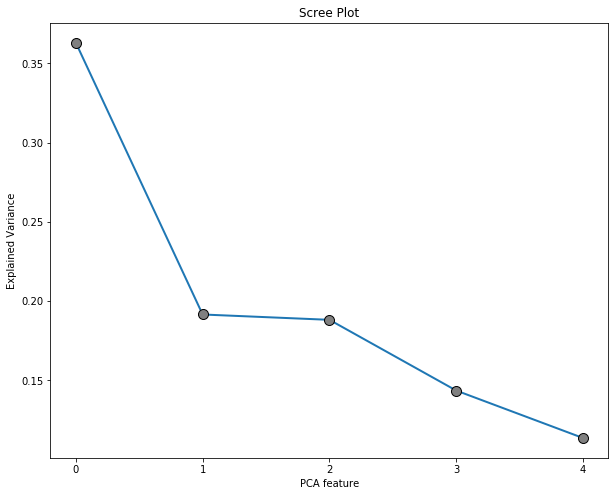

In [118]:
# INSTANTIATING a PCA object with no limit to principal components
bf_pca = PCA(n_components = None,
          random_state = 802)


# FITTING and TRANSFORMING the scaled data
ptraits_pca = bf_pca.fit_transform(ptraits_scaled)


# calling the scree_plot function
scree_plot(pca_object = bf_pca)

In [119]:
# Checking each components explained variance ratio

# component number counter
component_number = 0

# looping over each principal component
for variance in bf_pca.explained_variance_ratio_:
    component_number += 1
    
    print(f"PC {component_number} : {variance.round(3)}")

PC 1 : 0.363
PC 2 : 0.192
PC 3 : 0.188
PC 4 : 0.144
PC 5 : 0.114


In [120]:
# Create Factor Loadings

ptraits_factor_loadings = pd.DataFrame(pd.np.transpose(bf_pca.components_))
ptraits_factor_loadings = ptraits_factor_loadings.set_index(ptraits_scaled.columns)

In [122]:
# INSTANTIATING a new PCA object with only 2 principal components
bf_pca_2 = PCA(n_components = 2,
          random_state = 802)


# FITTING and TRANSFORMING the scaled data
ptraits_pca_2 = bf_pca_2.fit_transform(ptraits_scaled)


##################
### 2 PC Model ###
##################
# transposing pca components (pc = 2)
ptraits_factor_loadings_2 = pd.DataFrame(pd.np.transpose(bf_pca_2.components_))


# naming rows as original features
ptraits_factor_loadings_2 = ptraits_factor_loadings_2.set_index(ptraits_scaled.columns)

# Naming Principal Components
ptraits_factor_loadings_2.columns = ['Early Adopters',
                           'Skeptics']

# checking the results
print(f"""
MAX Components Factor Loadings
------------------------------
{ptraits_factor_loadings.round(2)}


3 Components Factor Loadings
------------------------------
{ptraits_factor_loadings_2.round(2)}

""")


MAX Components Factor Loadings
------------------------------
                      0     1     2     3     4
openness          -0.51  0.23  0.21 -0.69  0.41
conscientiousness -0.52 -0.33  0.36 -0.03 -0.70
extraversion      -0.34  0.54 -0.69  0.02 -0.35
aggreableness     -0.51  0.17  0.21  0.72  0.38
neuroticism        0.30  0.72  0.56  0.03 -0.28


3 Components Factor Loadings
------------------------------
                   Early Adopters  Skeptics
openness                    -0.51      0.23
conscientiousness           -0.52     -0.33
extraversion                -0.34      0.54
aggreableness               -0.51      0.17
neuroticism                  0.30      0.72




Principal Component Analysis on HULT DNA

In [82]:
# Scaling Personality Traits DataFrame
# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler with the data
scaler.fit(hult_dna_df)


# TRANSFORMING our data after fit
X_scaled = scaler.transform(hult_dna_df)


# converting scaled data into a DataFrame
hult_dna_scaled = pd.DataFrame(X_scaled)

# reattaching column names
hult_dna_scaled.columns = hult_dna_df.columns


# checking pre- and post-scaling variance
print(pd.np.var(hult_dna_df), '\n\n')
print(pd.np.var(hult_dna_scaled))



thinking         5.064371
communicating    4.151881
teambuilding     4.997732
dtype: float64 


thinking         1.0
communicating    1.0
teambuilding     1.0
dtype: float64


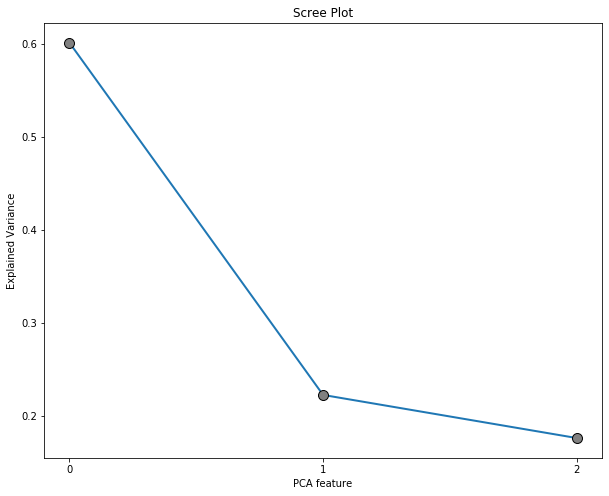

In [112]:
# INSTANTIATING a PCA object with no limit to principal components
pca = PCA(n_components = None,
          random_state = 802)


# FITTING and TRANSFORMING the scaled data
hult_dna_pca = pca.fit_transform(hult_dna_scaled)


# calling the scree_plot function
scree_plot(pca_object = pca)

In [113]:
# Create Factor Loadings

hult_dna_factor_loadings = pd.DataFrame(pd.np.transpose(pca.components_))
hult_dna_factor_loadings = hult_dna_factor_loadings.set_index(hult_dna_scaled.columns)



In [114]:
hult_dna_factor_loadings

,0,1,2
thinking,-0.561826,-0.703947,0.434523
communicating,-0.608007,-0.004803,-0.793917
teambuilding,-0.560962,0.710236,0.425306


In [117]:
# INSTANTIATING a new PCA object with only 2 principal components
pca_2 = PCA(n_components = 2,
          random_state = 802)


# FITTING and TRANSFORMING the scaled data
hult_dna_pca_2 = pca_2.fit_transform(hult_dna_scaled)


##################
### 2 PC Model ###
##################
# transposing pca components (pc = 2)
hult_dna_factor_loadings_2 = pd.DataFrame(pd.np.transpose(pca_2.components_))


# naming rows as original features
hult_dna_factor_loadings_2 = hult_dna_factor_loadings_2.set_index(hult_dna_scaled.columns)

# Naming Principal Components
hult_dna_factor_loadings_2.columns = ['Liability',
                           'Animators']

# checking the results
print(f"""
MAX Components Factor Loadings
------------------------------
{hult_dna_factor_loadings.round(2)}


2 Components Factor Loadings
------------------------------
{hult_dna_factor_loadings_2.round(2)}

""")



MAX Components Factor Loadings
------------------------------
                  0     1     2
thinking      -0.56 -0.70  0.43
communicating -0.61 -0.00 -0.79
teambuilding  -0.56  0.71  0.43


2 Components Factor Loadings
------------------------------
               Liability  Animators
thinking           -0.56      -0.70
communicating      -0.61      -0.00
teambuilding       -0.56       0.71




Clustering on Big Five

In [128]:
# Scaling the pca dataframe
# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()

ptraits_pca_df = pd.DataFrame(ptraits_pca_2)

# FITTING the scaler with the data
scaler.fit(ptraits_pca_df)


# TRANSFORMING our data after fit
X_scaled = scaler.transform(ptraits_pca_df)


# converting scaled data into a DataFrame
ptraits_pca_scaled = pd.DataFrame(X_scaled)

# reattaching column names
#ptraits_pca_scaled.columns = ptraits_df.columns


# checking pre- and post-scaling variance
print(pd.np.var(ptraits_pca_df), '\n\n')
print(pd.np.var(ptraits_pca_scaled))


0    1.815486
1    0.957818
dtype: float64 


0    1.0
1    1.0
dtype: float64


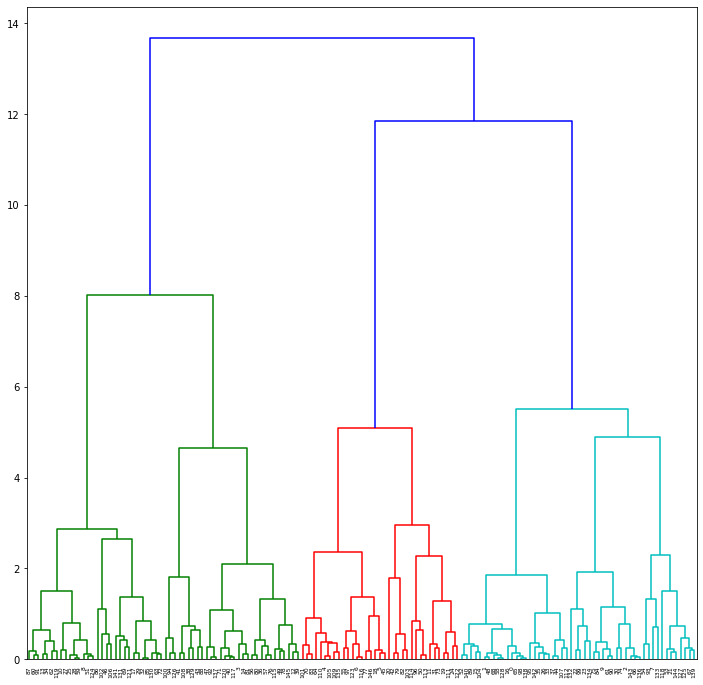

In [129]:
# grouping data based on Ward distance
standard_mergings_ward = linkage(y = ptraits_pca_scaled,
                                 method = 'ward')


# setting plot size
fig, ax = plt.subplots(figsize=(12, 12))

# developing a dendrogram
dendrogram(Z = standard_mergings_ward,
           leaf_rotation = 90,
           leaf_font_size = 6)


# saving and displaying the plot
#plt.savefig('standard_hierarchical_clust_ward.png')
plt.show()

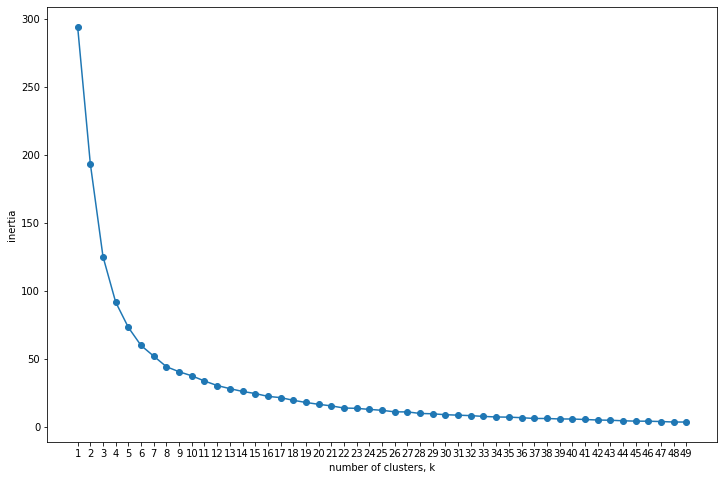

In [130]:
# Inertia plot of sclaed pca dataframe (Big Five)
inertia_plot(ptraits_pca_scaled)

In [153]:
# Clustering Personality Trait
# INSTANTIATING a k-Means object with 3 clusters
ptraits_k_pca = KMeans(n_clusters = 6,
                        random_state = 802)


# fitting the object to the data
ptraits_k_pca.fit(ptraits_pca_scaled)


# converting the clusters to a DataFrame
ptraits_kmeans_pca = pd.DataFrame({'Cluster': ptraits_k_pca.labels_})


# checking the results
print(ptraits_kmeans_pca.iloc[: , 0].value_counts())

2    37
3    29
0    28
5    19
4    19
1    15
Name: Cluster, dtype: int64


In [154]:
# storing cluster centers
centroids_pca = ptraits_k_pca.cluster_centers_


# converting cluster centers into a DataFrame
centroids_pca_df = pd.DataFrame(centroids_pca)


# renaming principal components
centroids_pca_df.columns = ['Early Adopters',
                           'Skeptics']


# checking results (clusters = rows, pc = columns)
centroids_pca_df.round(2)

,Early Adopters,Skeptics
0,0.73,-1.16
1,0.39,1.61
2,0.05,0.01
3,-1.04,-0.74
4,1.40,0.60
5,-1.31,0.95


In [156]:
ptraits_centroids = centroids_pca_df
ptraits_centroids["Cluster Size"] = ptraits_kmeans_pca.iloc[: , 0].value_counts()
ptraits_centroids

,Early Adopters,Skeptics,Cluster Size
0,0.725424,-1.156458,28
1,0.394195,1.610390,15
2,0.054634,0.005223,37
3,-1.038467,-0.736422,29
4,1.403584,0.599880,19
5,-1.305201,0.946854,19


Concatenating Demographics with Cluster Result 

Clustering for HULT DNA

In [157]:
# Scaling the pca dataframe
# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()

hult_dna_pca_df = pd.DataFrame(hult_dna_pca_2)

# FITTING the scaler with the data
scaler.fit(hult_dna_pca_df)


# TRANSFORMING our data after fit
X_scaled = scaler.transform(hult_dna_pca_df)


# converting scaled data into a DataFrame
hult_dna_pca_scaled = pd.DataFrame(X_scaled)



# checking pre- and post-scaling variance
print(pd.np.var(ptraits_pca_df), '\n\n')
print(pd.np.var(ptraits_pca_scaled))



0    1.815486
1    0.957818
dtype: float64 


0    1.0
1    1.0
dtype: float64


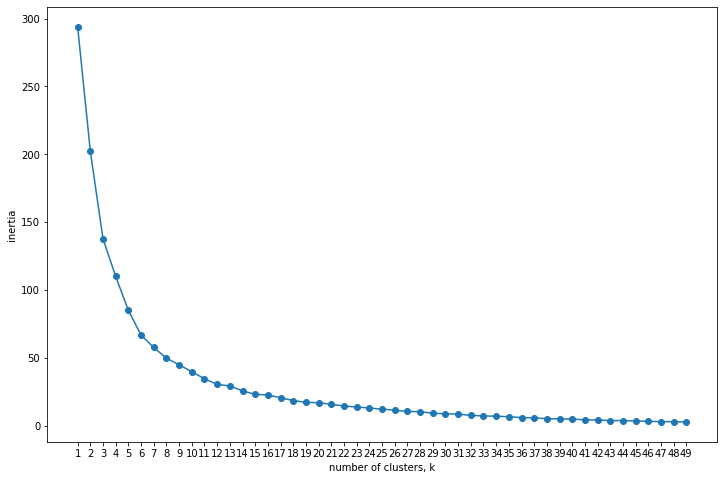

In [158]:
# Inertia plot of sclaed pca dataframe (Big Five)
inertia_plot(hult_dna_pca_scaled)

In [172]:
# Clustering Personality Trait
# INSTANTIATING a k-Means object with 3 clusters
hult_dna_k_pca = KMeans(n_clusters = 7,
                        random_state = 802)


# fitting the object to the data
hult_dna_k_pca.fit(hult_dna_pca_scaled)


# converting the clusters to a DataFrame
hult_dna_kmeans_pca = pd.DataFrame({'Cluster': hult_dna_k_pca.labels_})


# checking the results
print(hult_dna_kmeans_pca.iloc[: , 0].value_counts())

1    39
0    29
4    21
3    20
6    18
2    13
5     7
Name: Cluster, dtype: int64


In [173]:
# storing cluster centers
centroids_dna_pca = hult_dna_k_pca.cluster_centers_


# converting cluster centers into a DataFrame
centroids_dna_pca_df = pd.DataFrame(centroids_dna_pca)


# renaming principal components
centroids_dna_pca_df.columns = ['Liability',
                           'Animators']


# checking results (clusters = rows, pc = columns)
centroids_dna_pca_df.round(2)

,Liability,Animators
0,0.10,-1.24
1,0.06,-0.16
2,0.97,1.46
3,-0.22,0.81
4,-1.43,-0.28
5,-1.59,2.08
6,1.55,-0.10


In [174]:
hult_dna_centroids = centroids_dna_pca_df
hult_dna_centroids["Cluster Size"] = hult_dna_kmeans_pca.iloc[: , 0].value_counts()
hult_dna_centroids

,Liability,Animators,Cluster Size
0,0.101003,-1.240831,29
1,0.056114,-0.157943,39
2,0.973059,1.460261,13
3,-0.216568,0.812368,20
4,-1.434121,-0.276961,21
5,-1.593342,2.077759,7
6,1.546334,-0.100833,18


Concatenate Big Five Cluster and Demographocs 

In [175]:
dem_df

,dem1,dem2,dem3,dem4,dem5,dem6,dem7
0,Macbook,Macbook,DD (MIB & Business Analytics),25,Female,ecuador,Hispanic / Latino
1,Windows laptop,Windows laptop,One year Business Analytics,27,Male,Ecuador,Hispanic / Latino
2,Windows laptop,Windows laptop,One year Business Analytics,25,Male,Indian,West Asian / Indian
3,Windows laptop,Windows laptop,One year Business Analytics,26,Female,indian,West Asian / Indian
4,Macbook,Windows laptop,DD (MBA & Disruptive innovation),27,Male,China,Far east Asian
...,...,...,...,...,...,...,...
142,Macbook,Macbook,One year Business Analytics,25,Male,Congolese (DR CONGO),African American
143,Windows laptop,Windows laptop,One year Business Analytics,24,Male,Norwegian,White / Caucasian
144,Windows laptop,Windows laptop,One year Business Analytics,21,Male,German,White / Caucasian
145,Macbook,Macbook,One year Business Analytics,25,Female,canadian,White / Caucasian


In [178]:
ptraits_pca_2_df = pd.DataFrame(ptraits_pca_2)

ptraits_cluster_df = pd.concat([ptraits_kmeans_pca,
                               ptraits_pca_2_df],
                               axis = 1
                              )

In [180]:
# concatenating demographic information with pca-clusters
final_ptraits_pca_clust_df = pd.concat([dem_df.loc[ : , ['dem2', 'dem4','dem5']],
                                  ptraits_cluster_df],
                                  axis = 1)


# renaming columns
final_ptraits_pca_clust_df.columns = ['Future Computer',
                              'Age',
                              'Gender',
                              'Cluster',
                              'Early Adopters',
                              'Skeptics']

final_ptraits_pca_clust_df

,Future Computer,Age,Gender,Cluster,Early Adopters,Skeptics
0,Macbook,25,Female,2,-0.025988,-0.221107
1,Windows laptop,27,Male,2,0.271296,-0.320236
2,Windows laptop,25,Male,0,0.630724,-1.498449
3,Windows laptop,26,Female,2,0.150387,0.540674
4,Windows laptop,27,Male,4,1.699904,0.501627
...,...,...,...,...,...,...
142,Macbook,25,Male,2,0.594297,-0.159281
143,Windows laptop,24,Male,0,0.560106,-1.308891
144,Windows laptop,21,Male,0,1.809338,-0.577522
145,Macbook,25,Female,2,-0.904369,0.131865


In [188]:
final_ptraits_pca_clust_df[["Future Computer","Cluster","Early Adopters"]].groupby("Future Computer").count()

,Cluster,Early Adopters
Future Computer,,
Chromebook,4,4
Macbook,83,83
Windows laptop,60,60


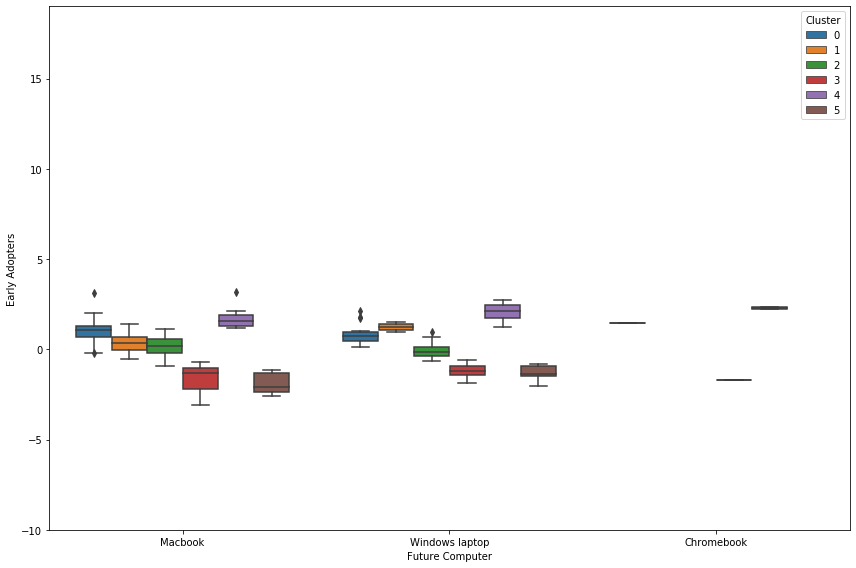

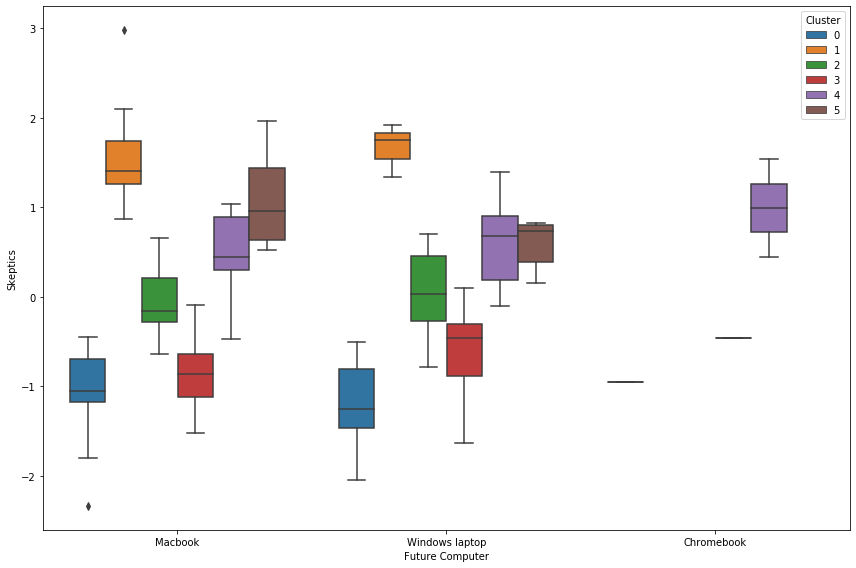

In [181]:
########################
# Channel
########################

# Early Adopters
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Future Computer',
            y = 'Early Adopters',
            hue = 'Cluster',
            data = final_ptraits_pca_clust_df)

plt.ylim(-10, 19)
plt.tight_layout()
plt.show()



# Skeptics
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Future Computer',
            y = 'Skeptics',
            hue = 'Cluster',
            data = final_ptraits_pca_clust_df)

#plt.ylim(-3, 6)
plt.tight_layout()
plt.show()



In [182]:
hult_dna_pca_2_df = pd.DataFrame(hult_dna_pca_2)

hult_dna_cluster_df = pd.concat([hult_dna_kmeans_pca,
                               hult_dna_pca_2_df],
                               axis = 1
                              )

# concatenating demographic information with pca-clusters
final_hult_dna_pca_clust_df = pd.concat([dem_df.loc[ : , ['dem2', 'dem4','dem5']],
                                  hult_dna_cluster_df],
                                  axis = 1)


# renaming columns
final_hult_dna_pca_clust_df.columns = ['Future Computer',
                              'Age',
                              'Gender',
                              'Cluster',
                              'Liability',
                              'Animators']

final_hult_dna_pca_clust_df

,Future Computer,Age,Gender,Cluster,Liability,Animators
0,Macbook,25,Female,1,0.219485,-0.115383
1,Windows laptop,27,Male,4,-1.675579,-0.743177
2,Windows laptop,25,Male,6,3.164449,0.192177
3,Windows laptop,26,Female,5,-2.786547,1.174983
4,Windows laptop,27,Male,2,0.670057,0.820682
...,...,...,...,...,...,...
142,Macbook,25,Male,5,-2.729296,1.468578
143,Windows laptop,24,Male,0,-0.327288,-1.061054
144,Windows laptop,21,Male,0,0.770076,-1.061232
145,Macbook,25,Female,1,0.170748,0.195067


,Liability,Animators
Future Computer,,
Chromebook,4,4
Macbook,83,83
Windows laptop,60,60


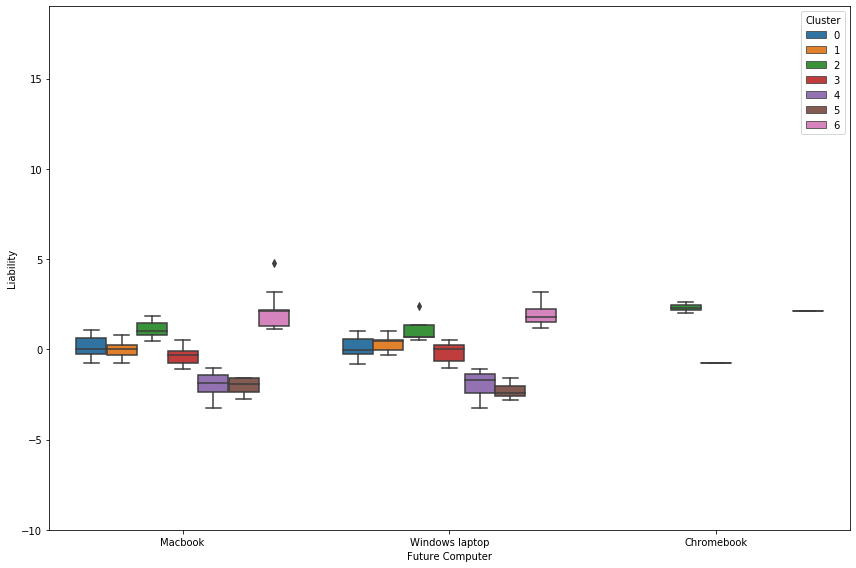

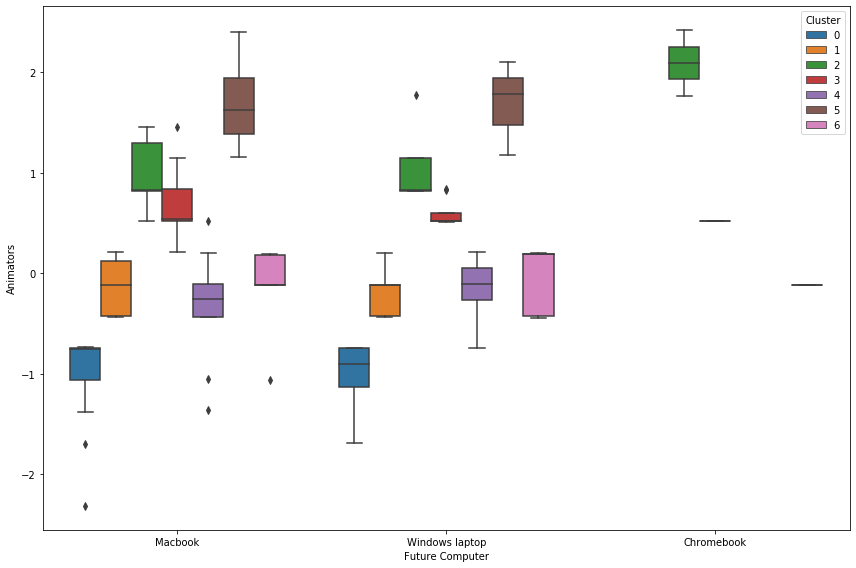

In [183]:
########################
# Future Computer
########################

# Early Adopters
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Future Computer',
            y = 'Liability',
            hue = 'Cluster',
            data = final_hult_dna_pca_clust_df)

plt.ylim(-10, 19)
plt.tight_layout()
plt.show()



# Skeptics
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Future Computer',
            y = 'Animators',
            hue = 'Cluster',
            data = final_hult_dna_pca_clust_df)

#plt.ylim(-3, 6)
plt.tight_layout()
plt.show()